# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code and some require graphical results. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Chapter 2 of the textbook is based on a similar workflow to this assignment, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

## The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impported by me 
from sklearn.preprocessing import OneHotEncoder
import datetime
from sklearn.base import BaseEstimator, TransformerMixin

# For plots 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

**STEP01:** 
Load the data set from the csv file (SeoulBikeData.csv) into a DataFrame, and summarise it with the pandas functions `describe()` and `info()`.

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

_Points:_ 2

In [32]:
# Load the data 
data = pd.read_csv("SeoulBikeData.csv")

# Take a peek into the data 
# DOES NOT LOAD 
data.head()

# The following code is used by the autograder, don't change it
step1_sol = data.shape

In [33]:
# Load a description of the data

# Note that the dataset contains 8760 instances which is considered small in context of Machine Learning.
# This data set may not be large enough to run certain complex models optimally. 
# Some features appear to have null values, these need to be addressed before applying any models.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [34]:
# Load the season categories with count
data["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [35]:
# Summary of Temperature, humidity, wind speed and visibility attributes

# Checking for outliers or unusal values i.e. humiditity less than 0 

data.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


grader.check("step01")

**STEP02:** To get a feeling for the data it is a good idea to do some form of simple visualisation. Display a set of histograms for the features as they are right now, prior to any cleaning steps.

_Points:_ 0

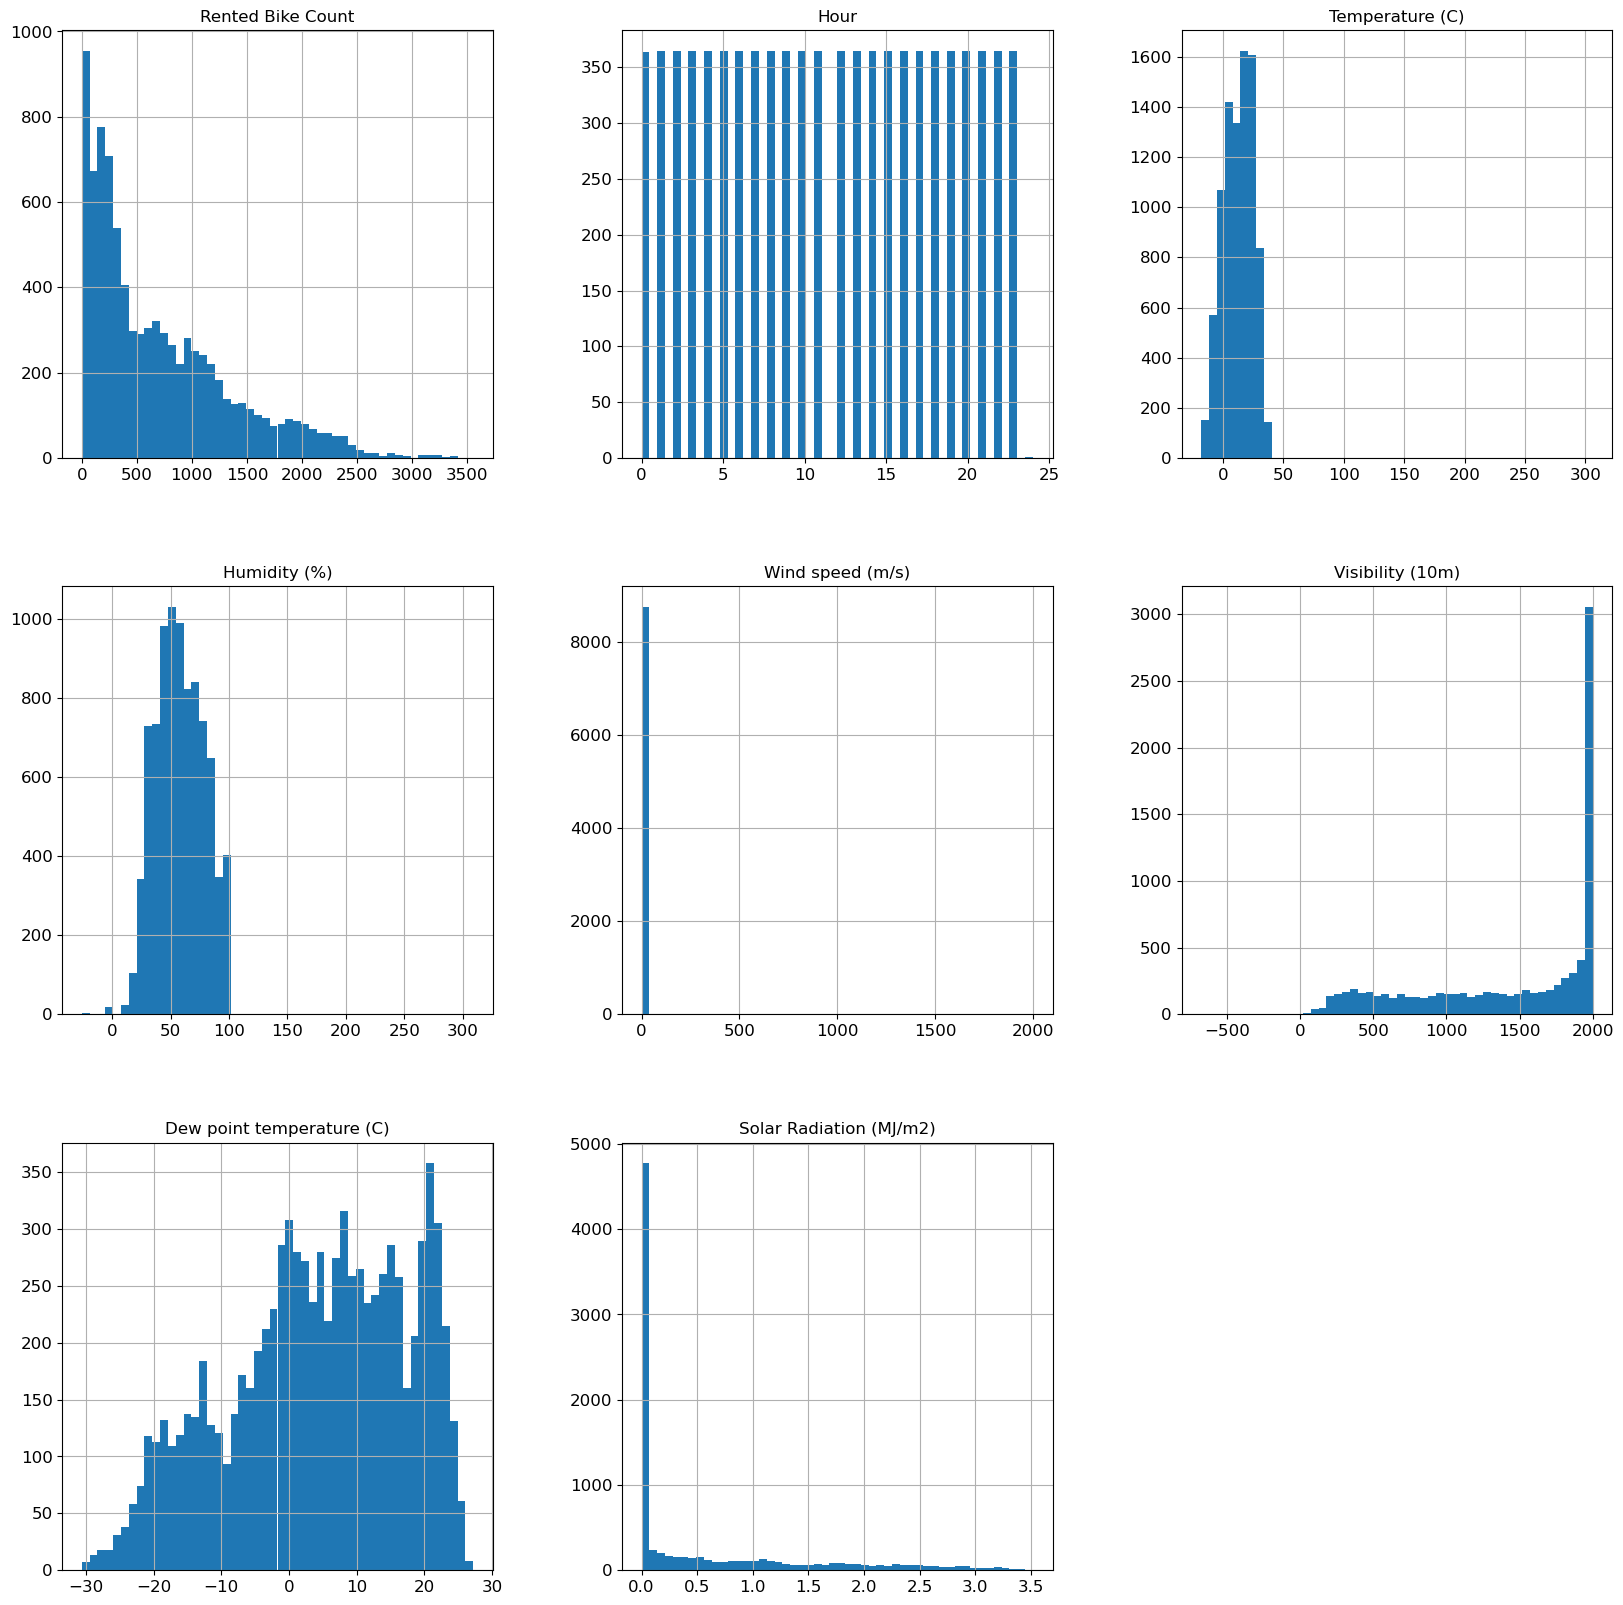

In [36]:
data.hist(bins=50, figsize=(20,20))
plt.show()

grader.check("step02")

**STEP03:** The "Functioning Day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed. After doing this, delete the Functioning Day feature from the DataFrame and verify that this worked. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [37]:
# Sanity check (ensure non bussiness days do not contain ant bike rentals)

print(data[(data['Functioning Day'] == 'No') & (data['Rented Bike Count'] != 0)])

# Now remove rows which represent non-bussiness days 
data = data[data['Functioning Day'] == 'Yes']

# Delete the functioning Day feature 
data.drop(columns=['Functioning Day'], inplace=True)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step3_data = data.copy()

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature (C), Humidity (%), Wind speed (m/s), Visibility (10m), Dew point temperature (C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []


In [38]:
# check if deleted
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 925.

grader.check("step03")

**STEP04:** 
The goal is to predict bike rental demand using historical data. To achieve this, you will use regression techniques with "Bike Rental Count" as the target feature for this prediction, *but for this*, it is important that all other features in the data are numerical. Two of the features in the data, "Holiday" and "Season", need to be converted to numerical format. Write code to convert the "Holiday" feature to 0 or 1 from its current format. For the "Season" feature, add 4 new columns, labeled as "Winter", "Spring", "Summer", and "Autumn" then remove the "Season" column. Each of these columns should store a 0 or 1, depending on the corresponding season in each row. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [39]:
# convert holiday feature to 0 or 1
data['Holiday'] = data['Holiday'].map({'No Holiday':0, 'Holiday':1})

# view and verify Holiday feature 
data.head()

# Moving this code after the last cell of part 4
# The following code is used by the autograder, don't change it
# step4_data = data.copy()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


In [40]:
# Season feature 

# Initialise encoder 
encoder = OneHotEncoder()

# Apply fit transform to convert categorical variables to array
seasons_encoder = encoder.fit_transform(data[['Seasons']]).toarray()

# Creating data frames for encoded seasons 
seasons = pd.DataFrame(seasons_encoder, columns=encoder.categories_[0])

# concatenate seasons with orginal data 
data=data.join(seasons)

# delete the season feature 
data = data.drop(['Seasons'], axis=1)

# verify 
data.head()

# The following code is used by the autograder, don't change it
step4_data = data.copy()

grader.check("step04")

**STEP05**: It is known that bike rentals depend strongly on whether it's a weekday or a weekend. Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [41]:
# Function to check if day is a weekday or not
def is_weekday(datestring):
    # split to extract year, month and date
    dsplit = datestring.split('/')
    # weekday() returns 0 if Monday ..., 6 if Sunday 
    weekday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    # returns 0 if weekday, 1 if weekend
    return int(weekday<=4)

# Apply function to data 
data['Weekday']=data['Date'].transform(is_weekday)

# Remove date feature
data = data.drop(['Date'], axis=1)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step5_data
step5_data = data.copy()

In [42]:
# verify 
data.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0.0,0.0,0.0,1.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0.0,0.0,0.0,1.0,1


grader.check("step05")

**STEP06** Convert all the remaining data to numerical format, with any non-numerical entries set to NaN.

_Points:_ 3

In [43]:
# Following on from workshop 2, using function to_numeric 
data = data.apply(pd.to_numeric, errors='coerce')

# The following code is used by the autograder
# make sure your variable that contains that DataFrame from this step is the one assigned to step6_data
step6_data = data.copy()

grader.check("step06")

In [44]:
# verify 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   int64  
 4   Wind speed (m/s)           8464 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8464 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8440 non-null   float64
 9   Snowfall (cm)              8442 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Autumn                     8170 non-null   float64
 12  Spring                     8170 non-null   float64
 13  Summer                     8170 non-null   float64
 1

**STEP07** Examin the data and identify problematic entries. Set any problematic values in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

_Points:_ 3

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# no problamatic values
#print(data.isna().sum())

# pre-processing 

#data[data["Temperature (C)"] > 50] = np.nan
#data[data["Wind speed (m/s)"] > 50] = np.nan
#data[data["Visibility (10m)"] < 10] = np.nan
#data[data["Humidity (%)"] < 0] = np.nan

# replace unusal values with np.nan
class custom_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, use_features=True):
        self.use_features = use_features
    
    def fit(self, data, y=None):
        return self
    
    def transform(self, data, Y=None):
        data = data.copy()

        # Replace unusual values with NaN
        data.loc[(data['Temperature (C)'] < -50) | (data['Temperature (C)'] > 50), 'Temperature (C)'] = np.nan
        data.loc[(data['Humidity (%)'] < 0) | (data['Humidity (%)'] > 100), 'Humidity (%)'] = np.nan
        data.loc[(data['Wind speed (m/s)'] < 0) | (data['Wind speed (m/s)'] > 50), 'Wind speed (m/s)'] = np.nan
        data.loc[data['Visibility (10m)'] < 0, 'Visibility (10m)'] = np.nan

        if self.use_features:
            data = data[['Temperature (C)', 'Hour', 'Dew point temperature (C)', 'Winter']].copy()

        return data
        
# keep the variable name pipeline_step7 as you will use it in STEP09
# define the pipeline 
pipeline_step7 = Pipeline([
    ('custom_transformer', custom_transformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

pipeline_step7.fit_transform(data)

#print("Transformed data:")
#print(data.head())

# The following code is used by the autograder
# make sure your variable that contains the solutions from this step is the one assigned to step7_data as follows
step7_data = [data.copy(),pipeline_step7]

grader.check("step07")

**STEP08:** Generate a pre-processed version of the entire dataset by applying the pipeline defined in STEP07. Then, calculate the correlation of each feature with the target using either the pandas function corr() or numpy corrcoef() and find the 3 attributes that are the most correlated with bike rentals. 

_Points:_ 3

In [46]:
# Apply the pipeline
data_temp = pipeline_step7.fit_transform(data)
# NOTE: we do not want to use this again so we can ensure that the final model is trained on unseen data

# caluclate the correlation 
# convert to data frame to calculate 
columns = ["Rented Bike Count",	"Hour", "Temperature (C)", "Humidity (%)", "Wind speed (m/s)",	"Visibility (10m)",	
           "Dew point temperature (C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)",	"Holiday", "Autumn", "Spring", "Summer", "Winter", "Weekday"]

data_temp_dataframe = pd.DataFrame(data_temp, columns=columns)

correlation_matrix = data_temp_dataframe.corr()
correlation_matrix["Rented Bike Count"].abs().sort_values(ascending=False)

# find three attributes most correlated 
# top_3 should be an array of 3 strings ['attribute name', 'attribute name','attribute name']
top_3 = correlation_matrix["Rented Bike Count"].abs()[1:].sort_values(ascending=False)[:3]
# turn into a list so that so that it is fromatted as required by gradescope
top_3 = top_3.index.values.tolist()
print(top_3)

# The following code is used by the autograder
# make sure your variable that contains a list of the names of the top 3 attributes is assigned to step3_data
step8_data = top_3.copy()

['Temperature (C)', 'Winter', 'Hour']


grader.check("step08")

**STEP09:** Divide the data into training and test sets using where 20% of the data is kept for testing. Create a pipeline that includes the linear regression model in addition to the pipeline defined in STEP07. Fit the pipeline to the training set and calculate the `rmse` of the fit to evaluate its performance. As a comparison, compute the `rmse` that would be obtained by predicting the mean value of bike rentals for all training examples.

_Points:_ 3

In [47]:
# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step9
from sklearn.pipeline import make_pipeline

# Split the training and test set where 20% is kept for testing
training_set, testing_set = train_test_split(data, test_size=0.2, random_state=42)

# separating data as this is the value to predict
X_train = training_set.drop(["Rented Bike Count"], axis=1)
y_train = training_set["Rented Bike Count"].copy()

X_test = testing_set.drop(["Rented Bike Count"], axis=1)
y_test = testing_set["Rented Bike Count"].copy()

# Linear regression pipeline including all features 
pipeline_step9 = Pipeline([
    ('custom_transformer', custom_transformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('lr',LinearRegression())
])

# Fit the training data

# train
pipeline_step9.fit(X_train, y_train)
# predict 
Y_prediction_linear_regression = pipeline_step9.predict(X_train)

# calculate the RMSE of the fit to the training data
rmse_train = np.sqrt(mean_squared_error(Y_prediction_linear_regression, y_train))
print(f'Linear Regression RMSE Model: {rmse_train}')

# calculate the RMSE of the baseline model (by predicting the mean value of bike rentals for all training examples)
baseline = np.full(y_train.shape, y_train.mean())
rmse_baseline = mean_squared_error(y_train, baseline, squared=False)
print(f'RMSE Baseline Model: {rmse_baseline}')

print("RMSE for training data:", rmse_train)
print("RMSE for baseline (predicting mean):", rmse_baseline)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step9_data = [rmse_train,rmse_baseline]

Linear Regression RMSE Model: 436.3385393855526
RMSE Baseline Model: 646.170499547999
RMSE for training data: 436.3385393855526
RMSE for baseline (predicting mean): 646.170499547999


C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

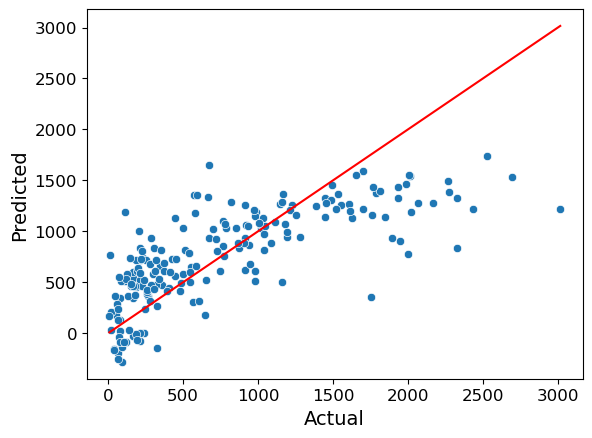

In [48]:
#The following code will show a visualisation of the fit for your linear regression.
# I will use your pipeline_step9 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step9.predict(X_train[:subset_size])

# Then I create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step09")

**STEP10:**  Fit a Kernel Ridge regression model (imported from sklearn.kernel_ridge) to the X_train data from STEP09. Build a new pipeline that includes the Kernel Ridge regression model in addition to the pipeline defined in STEP07, and fit it to the training data using default settings. Generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

_Points:_ 3

In [49]:
from sklearn.kernel_ridge import KernelRidge

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step10
pipeline_step10 = Pipeline([
    ('custom_transformer', custom_transformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('kr', KernelRidge())])

# fit the training data and make predictions on the training data
pipeline_step10.fit(X_train, y_train)
y_pred_train_KR = pipeline_step10.predict(X_train)

# calculate rmse for training data
rmse_train_KR = np.sqrt(mean_squared_error(y_pred_train_KR, y_train))
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step10_data = [rmse_train_KR,pipeline_step10]

Kernel Ridge model RMSE on training data: 851.6591412400843


C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

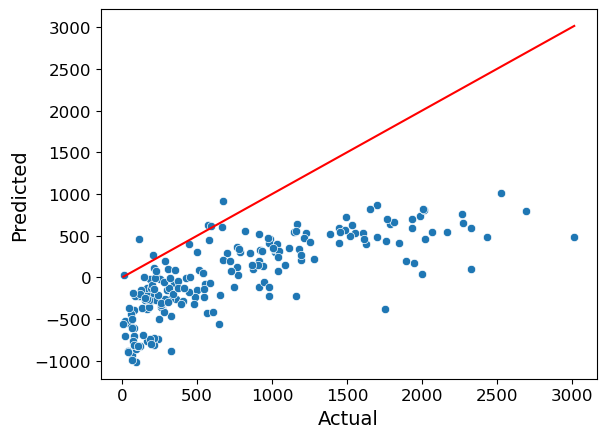

In [50]:
# I will use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step10.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step10")

**STEP11:** Fit a Support Vector Regression (from sklearn.svm import SVR). As you did for STEP10, create a new pipeline using the pipelinr from STEP07 and this model and fit it to your training data, using the default settings. Again, calculate the RMSE of the fit to the training data.

_Points:_ 4

In [51]:
from sklearn.svm import SVR

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step11
pipeline_step11 = Pipeline([
    ('custom_transformer', custom_transformer(use_features=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ('svr', SVR())])

# fit model and make predictions on the training data
pipeline_step11.fit(X_train, y_train)
y_pred_train_SVR = pipeline_step11.predict(X_train)

# calculate rmse for training data
rmse_train_SVR = np.sqrt(mean_squared_error(y_train,y_pred_train_SVR))
print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)


# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step11_data = [rmse_train_SVR,pipeline_step11]

Support Vector Regression model RMSE on training data: 531.9376431589083


C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\honey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Predicted')

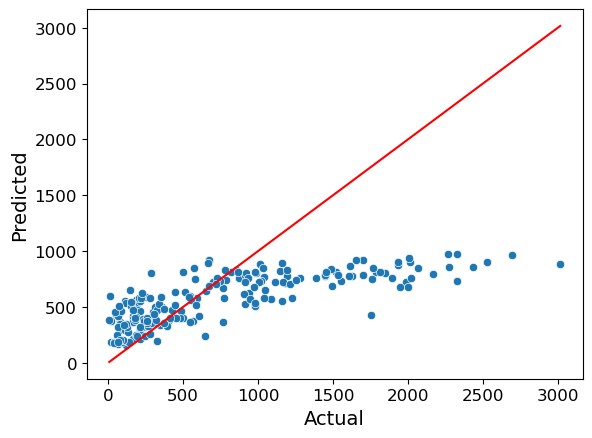

In [52]:
# use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step11.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

grader.check("step11")

**STEP12:** Perform a 10 fold cross validation for each of the three model (LinearRegression,KernelRidge,SVR). This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run. Find the mean and standard deviation of the rmse values obtained for each model for the validation splits.

_Points:_ 5

In [53]:
# you might need some or all of the following imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.model_selection import GridSearchCV

print("linear regression model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_trainr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    pipeline_step9.fit(X_trainr,y_trainr)
    y_pred = pipeline_step9.predict(X_val)
    rmse_LR_mean = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for linear regression is {rmse_LR_mean}')
    y_pred = pipeline_step9.predict(X_trainr)
    rmse_LR_mean = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for linear regression is {rmse_LR_mean}')

    
    
print(" ")    
print("Kernel Ridge model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_trainr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    pipeline_step10.fit(X_trainr,y_trainr)
    y_pred = pipeline_step10.predict(X_val)
    rmse_KR_mean = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for Kernel Ridge is {rmse_KR_mean}')
    y_pred = pipeline_step10.predict(X_trainr)
    rmse_KR_mean = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for Kernel Ridge is {rmse_KR_mean}')
  

print(" ")
print("SVM model: ")
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_trainr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    pipeline_step11.fit(X_trainr,y_trainr)
    y_pred = pipeline_step11.predict(X_val)
    rmse_SVR_mean = np.sqrt(mean_squared_error(y_pred,y_val))
    print(f'VAL RMSE for SVM is {rmse_SVR_mean}')
    y_pred = pipeline_step11.predict(X_trainr)
    rmse_SVR_mean = np.sqrt(mean_squared_error(y_pred,y_trainr))
    print(f'TRAIN RMSE for SVM is {rmse_SVR_mean}')

# The following code is used by the autograder
step12_data = [rmse_LR_mean,rmse_KR_mean,rmse_SVR_mean]

linear regression model: 
VAL RMSE for linear regression is 433.04885250908626
TRAIN RMSE for linear regression is 436.7619889643699
VAL RMSE for linear regression is 443.5418280714801
TRAIN RMSE for linear regression is 435.6792753697086
VAL RMSE for linear regression is 445.38022650538807
TRAIN RMSE for linear regression is 435.6774599566956
VAL RMSE for linear regression is 465.4078730662406
TRAIN RMSE for linear regression is 433.0635094806503
VAL RMSE for linear regression is 442.7460012713742
TRAIN RMSE for linear regression is 435.65869333418084
VAL RMSE for linear regression is 417.2069557549429
TRAIN RMSE for linear regression is 438.4779083845927
VAL RMSE for linear regression is 419.9506545108076
TRAIN RMSE for linear regression is 438.16280296266035
VAL RMSE for linear regression is 459.8993858634737
TRAIN RMSE for linear regression is 433.714476028876
VAL RMSE for linear regression is 424.98294071645216
TRAIN RMSE for linear regression is 437.6155690574616
VAL RMSE for lin

grader.check("step12")

**STEP13:** Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. Use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function GridSearchCV to do this.

For KernelRidge, vary the hyperparameter alpha. (note, if you are using KernelRidge as the last step in a pipeline, alpha is refered to as kernelridge__alpha) 

For SVR, vary the hyperparameter C. (note, if you are using SVR as the last step in a pipeline, C is refered to as SVR__C)

Find the hyperparameter setting for each medel.

Finally, train and apply both models, with the best hyperparameter settings, to the test set and report the performance as rmse.

_Points:_ 5

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grids for grid search with new pipeline
kr_params = {'kernelridge__alpha': [1.0, 10.0, 100.0, 1000.0]}
svr_params = {'svr__C': [10000, 50000, 100000]}

# Perform grid search with 10-fold cross-validation for KernelRidge with new pipeline
kr_cv = GridSearchCV(Pipeline([('kernelridge', KernelRidge())]), kr_params, cv=KFold(n_splits=10), scoring='neg_mean_squared_error')
kr_cv.fit(X_train, y_train)

# Perform grid search with 10-fold cross-validation for SVR
svr_cv = GridSearchCV(SVR(kernel='linear'), svr_params, cv=KFold(n_splits=10), scoring='neg_mean_squared_error')
svr_cv.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_alpha = kr_cv.best_params_['kernelridge__alpha']
best_C = svr_cv.best_params_['svr__C']

print("Best alpha for KernelRidge:", best_alpha)
print("Best C for SVR:", best_C)

# Train final models with the best hyperparameters
pipeline_best_kr = Pipeline([('kernelridge', KernelRidge(alpha=best_alpha))])
pipeline_best_svr = Pipeline([('svr', SVR(kernel='linear', C=best_C))])

pipeline_best_kr.fit(X_train, y_train)
pipeline_best_svr.fit(X_train, y_train)

# Predict on the test set
y_pred_kr = pipeline_best_kr.predict(X_test)
y_pred_svr = pipeline_best_svr.predict(X_test)

# Calculate RMSE
kr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_kr))
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("RMSE for KernelRidge:", kr_rmse)
print("RMSE for SVR:", svr_rmse)

# The following code is used by the autograder
step13_data = [kr_rmse, svr_rmse, kr_cv, svr_cv, pipeline_best_kr, pipeline_best_svr]


ValueError: Invalid parameter 'svr' for estimator SVR(kernel='linear'). Valid parameters are: ['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'].

In [56]:
import seaborn as sns

# use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

NameError: name 'pipeline_best_svr' is not defined

grader.check("step13")